## Linear Regression Machine Learning Implementation, Case: South Jakarta House Price
## Part 3: Linear Regression Implementation
### Author: Edycakra Immanuel Sinaga

In [380]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
%matplotlib inline

Load Dataset

In [381]:
df = pd.read_csv('../data/final/olx_house_final_improve_ENG.csv', encoding='latin-1')

In [382]:
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    238 non-null    int64 
 1   NBATH   238 non-null    int64 
 2   NFLOOR  238 non-null    int64 
 3   BLDAR   238 non-null    int64 
 4   LNDAR   238 non-null    int64 
 5   CERT    238 non-null    object
 6   LOC     238 non-null    object
 7   Price   238 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.0+ KB


In [384]:
df.describe()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,2.991597,2.268908,1.773109,81.201681,88.819328,1.150313e+09
std,0.811269,0.973900,0.587306,29.656850,41.143119,6.652019e+08
min,2.000000,1.000000,1.000000,15.000000,26.000000,5.000000e+06
25%,2.000000,2.000000,1.000000,60.000000,55.250000,6.250000e+08
50%,3.000000,2.000000,2.000000,72.000000,82.000000,1.100000e+09
75%,3.000000,3.000000,2.000000,94.000000,120.000000,1.600000e+09
max,6.000000,4.000000,3.000000,200.000000,200.000000,2.900000e+09


Splitting Data: Separate Features and Target

In [385]:
# X = df.drop(columns=["Price"])
# y = np.log(df["Price"])
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [386]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    238 non-null    int64 
 1   NBATH   238 non-null    int64 
 2   NFLOOR  238 non-null    int64 
 3   BLDAR   238 non-null    int64 
 4   LNDAR   238 non-null    int64 
 5   CERT    238 non-null    object
 6   LOC     238 non-null    object
dtypes: int64(5), object(2)
memory usage: 13.1+ KB


In [387]:
X.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC
0,6,1,1,148,148,SHM,Setia Budi
1,5,4,3,84,200,SHM,Tebet
2,3,3,2,134,130,SHM,Pasar Minggu
3,3,2,1,132,100,SHM,Pesanggrahan
4,3,4,2,92,147,SHM,Pesanggrahan


In [388]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 238 entries, 0 to 237
Series name: Price
Non-Null Count  Dtype
--------------  -----
238 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [389]:
y.head()

0    1100000000
1    2100000000
2    2800000000
3    1480000000
4    2300000000
Name: Price, dtype: int64

One Hot Encode the Categorical Attributes before Separating Train and Test

In [390]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), ["CERT", "LOC"]), remainder='passthrough')

transformed = transformer.fit_transform(X)
X_transformed = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_transformed.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   onehotencoder__x0_HGB               238 non-null    float64
 1   onehotencoder__x0_Lainnya           238 non-null    float64
 2   onehotencoder__x0_SHM               238 non-null    float64
 3   onehotencoder__x1_Cilandak          238 non-null    float64
 4   onehotencoder__x1_Kebayoran Baru    238 non-null    float64
 5   onehotencoder__x1_Kebayoran Lama    238 non-null    float64
 6   onehotencoder__x1_Mampang Prapatan  238 non-null    float64
 7   onehotencoder__x1_Pancoran          238 non-null    float64
 8   onehotencoder__x1_Pasar Minggu      238 non-null    float64
 9   onehotencoder__x1_Pesanggrahan      238 non-null    float64
 10  onehotencoder__x1_Setia Budi        238 non-null    float64
 11  onehotencoder__x1_Tebet             238 non-n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Splitting Data: Separate Train and Test

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.15, random_state=2)


In [392]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 25 to 168
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   onehotencoder__x0_HGB               202 non-null    float64
 1   onehotencoder__x0_Lainnya           202 non-null    float64
 2   onehotencoder__x0_SHM               202 non-null    float64
 3   onehotencoder__x1_Cilandak          202 non-null    float64
 4   onehotencoder__x1_Kebayoran Baru    202 non-null    float64
 5   onehotencoder__x1_Kebayoran Lama    202 non-null    float64
 6   onehotencoder__x1_Mampang Prapatan  202 non-null    float64
 7   onehotencoder__x1_Pancoran          202 non-null    float64
 8   onehotencoder__x1_Pasar Minggu      202 non-null    float64
 9   onehotencoder__x1_Pesanggrahan      202 non-null    float64
 10  onehotencoder__x1_Setia Budi        202 non-null    float64
 11  onehotencoder__x1_Tebet             202 non-

In [393]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 20 to 90
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   onehotencoder__x0_HGB               36 non-null     float64
 1   onehotencoder__x0_Lainnya           36 non-null     float64
 2   onehotencoder__x0_SHM               36 non-null     float64
 3   onehotencoder__x1_Cilandak          36 non-null     float64
 4   onehotencoder__x1_Kebayoran Baru    36 non-null     float64
 5   onehotencoder__x1_Kebayoran Lama    36 non-null     float64
 6   onehotencoder__x1_Mampang Prapatan  36 non-null     float64
 7   onehotencoder__x1_Pancoran          36 non-null     float64
 8   onehotencoder__x1_Pasar Minggu      36 non-null     float64
 9   onehotencoder__x1_Pesanggrahan      36 non-null     float64
 10  onehotencoder__x1_Setia Budi        36 non-null     float64
 11  onehotencoder__x1_Tebet             36 non-nul

Standardize the Dataset

In [394]:
#separate numerical and categorical attributes (we will onehotencode the categorical attributes later)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#for training data
X_train_num=X_train[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
X_train_std = scaler.fit_transform(X_train_num)
X_train_std


array([[-0.01816981, -0.29977059,  0.36379791,  3.19791354,  0.57733642],
       [-0.01816981, -0.29977059,  0.36379791,  1.4265527 , -0.14837582],
       [-0.01816981, -0.29977059,  0.36379791, -0.34480814, -0.51123194],
       ...,
       [ 2.42869781,  1.75289581,  0.36379791,  0.45731752,  1.18209661],
       [ 1.205264  ,  0.72656261,  0.36379791,  1.25944318,  2.0529513 ],
       [-0.01816981, -0.29977059,  0.36379791, -1.28062142, -0.99504009]])

In [395]:
#for test data
X_test_num=X_test[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
# X_test_num.drop(columns=['CERT', 'LOC'], inplace=True)
X_test_std = scaler.fit_transform(X_test_num)
X_test_std

array([[ 1.51643978,  0.90901665,  0.5488213 ,  1.11945917,  1.06341374],
       [-1.14657642, -1.20224782, -1.42693538, -1.30155235, -1.24442033],
       [ 2.84794788, -0.14661559,  0.5488213 ,  3.35423904,  0.92765879],
       [ 0.18493168,  0.90901665,  0.5488213 ,  0.33728622,  0.76475286],
       [ 0.18493168,  0.90901665,  0.5488213 ,  0.78424219,  0.76475286],
       [ 0.18493168,  0.90901665,  0.5488213 , -0.18416241,  0.22173308],
       [-1.14657642, -1.20224782, -1.42693538, -0.55662573, -0.97291044],
       [ 1.51643978,  1.96464888,  2.52457798, -0.10966975,  1.36207462],
       [-1.14657642, -1.20224782, -1.42693538, -0.55662573, -1.29872231],
       [ 0.18493168,  0.90901665,  0.5488213 ,  0.63525687,  0.11312912],
       [ 0.18493168, -0.14661559,  0.5488213 , -0.18416241,  0.22173308],
       [-1.14657642, -1.20224782, -1.42693538, -1.30155235, -1.24442033],
       [ 0.18493168,  0.90901665,  0.5488213 ,  0.41177888,  1.85079242],
       [ 0.18493168, -0.14661559,  0.5

In [396]:
scaled_X_train = pd.DataFrame(X_train_std, index=X_train_num.index, columns=X_train_num.columns)
scaled_X_train.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR
25,-0.018170,-0.299771,0.363798,3.197914,0.577336
223,-0.018170,-0.299771,0.363798,1.426553,-0.148376
64,-0.018170,-0.299771,0.363798,-0.344808,-0.511232
141,-1.241604,-1.326104,-1.306365,-0.344808,-1.091802
153,1.205264,1.752896,0.363798,-0.077433,1.182097


In [397]:
#add categorical columns to standardized numerical columns
X_train_new= scaled_X_train[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
X_train_new["onehotencoder__x0_HGB"] = X_train["onehotencoder__x0_HGB"]
X_train_new["onehotencoder__x0_Lainnya"] = X_train["onehotencoder__x0_Lainnya"]
X_train_new["onehotencoder__x0_SHM"] = X_train["onehotencoder__x0_SHM"]
X_train_new["onehotencoder__x1_Cilandak"] = X_train["onehotencoder__x1_Cilandak"]
X_train_new["onehotencoder__x1_Kebayoran Baru"] = X_train["onehotencoder__x1_Kebayoran Baru"]
X_train_new["onehotencoder__x1_Kebayoran Lama"] = X_train["onehotencoder__x1_Kebayoran Lama"]
X_train_new["onehotencoder__x1_Mampang Prapatan"] = X_train["onehotencoder__x1_Mampang Prapatan"]
X_train_new["onehotencoder__x1_Pancoran"] = X_train["onehotencoder__x1_Pancoran"]
X_train_new["onehotencoder__x1_Pasar Minggu"] = X_train["onehotencoder__x1_Pasar Minggu"]
X_train_new["onehotencoder__x1_Pesanggrahan"] = X_train["onehotencoder__x1_Pesanggrahan"]
X_train_new["onehotencoder__x1_Setia Budi"] = X_train["onehotencoder__x1_Setia Budi"]
X_train_new["onehotencoder__x1_Tebet"] = X_train["onehotencoder__x1_Tebet"]

X_train_new.head()
# X_train.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,onehotencoder__x0_HGB,onehotencoder__x0_Lainnya,onehotencoder__x0_SHM,onehotencoder__x1_Cilandak,onehotencoder__x1_Kebayoran Baru,onehotencoder__x1_Kebayoran Lama,onehotencoder__x1_Mampang Prapatan,onehotencoder__x1_Pancoran,onehotencoder__x1_Pasar Minggu,onehotencoder__x1_Pesanggrahan,onehotencoder__x1_Setia Budi,onehotencoder__x1_Tebet
25,-0.018170,-0.299771,0.363798,3.197914,0.577336,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,-0.018170,-0.299771,0.363798,1.426553,-0.148376,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
64,-0.018170,-0.299771,0.363798,-0.344808,-0.511232,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
141,-1.241604,-1.326104,-1.306365,-0.344808,-1.091802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153,1.205264,1.752896,0.363798,-0.077433,1.182097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [398]:
scaled_X_test = pd.DataFrame(X_test_std, index=X_test_num.index, columns=X_test_num.columns)
scaled_X_test.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR
20,1.516440,0.909017,0.548821,1.119459,1.063414
149,-1.146576,-1.202248,-1.426935,-1.301552,-1.244420
30,2.847948,-0.146616,0.548821,3.354239,0.927659
54,0.184932,0.909017,0.548821,0.337286,0.764753
147,0.184932,0.909017,0.548821,0.784242,0.764753


In [399]:
#add categorical columns to standardized numerical columns
X_test_new= scaled_X_test[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
# X_test_new["CERT"] = X_test["CERT"]
# X_test_new["LOC"] = X_test["LOC"]
X_test_new["onehotencoder__x0_HGB"] = X_test["onehotencoder__x0_HGB"]
X_test_new["onehotencoder__x0_Lainnya"] = X_test["onehotencoder__x0_Lainnya"]
X_test_new["onehotencoder__x0_SHM"] = X_test["onehotencoder__x0_SHM"]
X_test_new["onehotencoder__x1_Cilandak"] = X_test["onehotencoder__x1_Cilandak"]
X_test_new["onehotencoder__x1_Kebayoran Baru"] = X_test["onehotencoder__x1_Kebayoran Baru"]
X_test_new["onehotencoder__x1_Kebayoran Lama"] = X_test["onehotencoder__x1_Kebayoran Lama"]
X_test_new["onehotencoder__x1_Mampang Prapatan"] = X_test["onehotencoder__x1_Mampang Prapatan"]
X_test_new["onehotencoder__x1_Pancoran"] = X_test["onehotencoder__x1_Pancoran"]
X_test_new["onehotencoder__x1_Pasar Minggu"] = X_test["onehotencoder__x1_Pasar Minggu"]
X_test_new["onehotencoder__x1_Pesanggrahan"] = X_test["onehotencoder__x1_Pesanggrahan"]
X_test_new["onehotencoder__x1_Setia Budi"] = X_test["onehotencoder__x1_Setia Budi"]
X_test_new["onehotencoder__x1_Tebet"] = X_test["onehotencoder__x1_Tebet"]
X_test_new.head()


,NBED,NBATH,NFLOOR,BLDAR,LNDAR,onehotencoder__x0_HGB,onehotencoder__x0_Lainnya,onehotencoder__x0_SHM,onehotencoder__x1_Cilandak,onehotencoder__x1_Kebayoran Baru,onehotencoder__x1_Kebayoran Lama,onehotencoder__x1_Mampang Prapatan,onehotencoder__x1_Pancoran,onehotencoder__x1_Pasar Minggu,onehotencoder__x1_Pesanggrahan,onehotencoder__x1_Setia Budi,onehotencoder__x1_Tebet
20,1.516440,0.909017,0.548821,1.119459,1.063414,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149,-1.146576,-1.202248,-1.426935,-1.301552,-1.244420,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30,2.847948,-0.146616,0.548821,3.354239,0.927659,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.184932,0.909017,0.548821,0.337286,0.764753,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147,0.184932,0.909017,0.548821,0.784242,0.764753,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [400]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 25 to 168
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NBED                                202 non-null    float64
 1   NBATH                               202 non-null    float64
 2   NFLOOR                              202 non-null    float64
 3   BLDAR                               202 non-null    float64
 4   LNDAR                               202 non-null    float64
 5   onehotencoder__x0_HGB               202 non-null    float64
 6   onehotencoder__x0_Lainnya           202 non-null    float64
 7   onehotencoder__x0_SHM               202 non-null    float64
 8   onehotencoder__x1_Cilandak          202 non-null    float64
 9   onehotencoder__x1_Kebayoran Baru    202 non-null    float64
 10  onehotencoder__x1_Kebayoran Lama    202 non-null    float64
 11  onehotencoder__x1_Mampang Prapatan  202 non-

In [401]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 20 to 90
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NBED                                36 non-null     float64
 1   NBATH                               36 non-null     float64
 2   NFLOOR                              36 non-null     float64
 3   BLDAR                               36 non-null     float64
 4   LNDAR                               36 non-null     float64
 5   onehotencoder__x0_HGB               36 non-null     float64
 6   onehotencoder__x0_Lainnya           36 non-null     float64
 7   onehotencoder__x0_SHM               36 non-null     float64
 8   onehotencoder__x1_Cilandak          36 non-null     float64
 9   onehotencoder__x1_Kebayoran Baru    36 non-null     float64
 10  onehotencoder__x1_Kebayoran Lama    36 non-null     float64
 11  onehotencoder__x1_Mampang Prapatan  36 non-nul

Define Model & Fit to Training Data

In [402]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lm= LinearRegression()

lm.fit(X_train_new, y_train)

LinearRegression()

In [403]:
print(lm.coef_)

[-1.56788465e+07  6.03033234e+07  4.89304553e+07  7.54819379e+07
  4.16274267e+08  1.18142250e+08 -3.69421357e+08  2.51279107e+08
  1.42215284e+08 -4.21732179e+07  4.30073237e+07  1.83758121e+08
  6.57220485e+07  7.91395745e+07  2.60749530e+08 -5.00971567e+08
 -2.31447097e+08]


In [404]:
print(lm.intercept_)

812505814.877099


Predict on the Test Set

In [405]:
reg_pred=lm.predict(X_test_new)

In [406]:
reg_pred

array([1.90959995e+09, 5.06936047e+08, 1.71949732e+09, 1.67012028e+09,
       1.78084879e+09, 1.17878383e+09, 6.34644295e+08, 1.90645308e+09,
       4.84414587e+08, 1.30332142e+09, 1.11512570e+09, 4.02317500e+08,
       2.12783345e+09, 1.60714725e+09, 1.00778181e+09, 2.02516914e+09,
       1.90439981e+09, 8.16340411e+08, 1.42135507e+09, 1.43480195e+09,
       5.89435263e+08, 8.67031017e+08, 3.88506980e+08, 1.07531258e+09,
       1.77696887e+09, 8.23973186e+08, 1.06333515e+09, 1.33979592e+09,
       8.21482642e+08, 1.08477322e+09, 1.32008962e+09, 6.30978100e+08,
       5.97570476e+08, 2.35979259e+09, 3.88899974e+08, 6.14662350e+08])

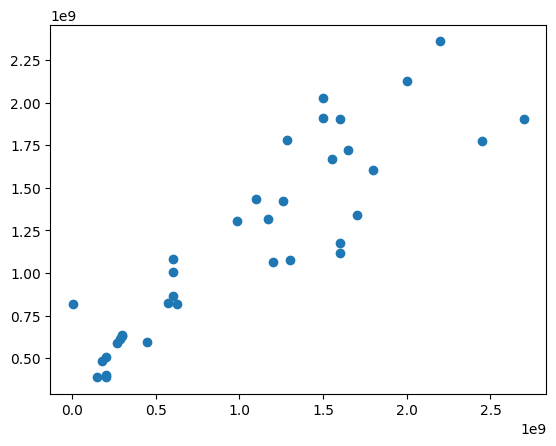

In [407]:
plt.scatter(y_test, reg_pred)

Evaluate Predictions: Performance Metrics with Visualization 

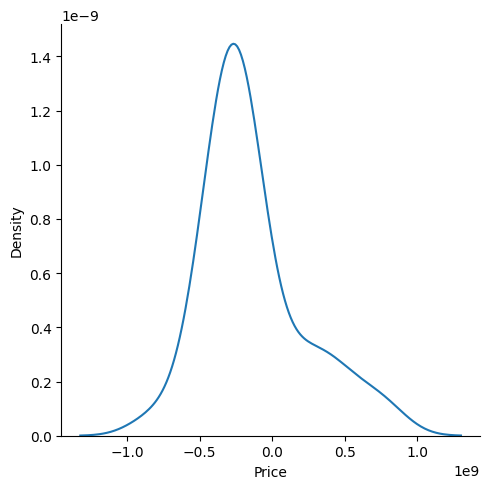

In [408]:
#residuals
residuals=y_test-reg_pred

#plot the residuals
sns.displot(residuals, kind="kde")

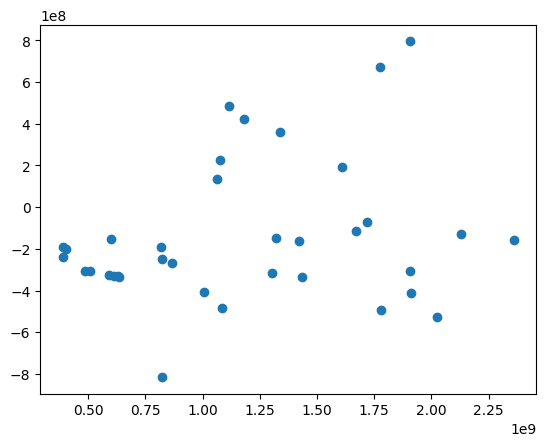

In [409]:
#scatter plot with respect to prediction and residuals
#need to get uniform distribution
plt.scatter(reg_pred, residuals)

In [413]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test/1000000000, reg_pred/1000000000))
print(np.sqrt(mean_squared_error(y_test/1000000000,reg_pred/1000000000)))

1.3492826824503296e+17
0.3220608546412398
0.36732583389278917


In [414]:
#R2 score and Adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

0.7382519656541124


In [415]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.49104548877188536

5-Fold Cross Validations


In [416]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [417]:


scores_r2=cross_val_score(lm, X_train_new, y_train, scoring="r2", cv=5)
sqrt(mean(absolute(scores_r2)))


0.7673969644199876

In [419]:
scores_rmse=cross_val_score(lm, X_train_new, y_train/1000000000, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
sqrt(mean(absolute(scores_rmse)))

0.4139450084668623

Input Data Prediction

In [420]:
#NBED, NBATH, NFLOOR, BLDAR, LNDAR, CERT, LOC
random_sample = [[3,3,2,134,130, "SHM", "Pasar Minggu"]]
print(random_sample)


[[3, 3, 2, 134, 130, 'SHM', 'Pasar Minggu']]


In [421]:
#transformation of input: numerical
temp_numerical = [[x for x in random_sample[0] if type(x) == int]]
# temp_numerical
transformed_numerical = scaler.transform(temp_numerical)
# transformed_numerical

#transformation of input: categorical
temp_categorical = [[x for x in random_sample[0] if type(x) != int]]
# temp_categorical

encoded_categorical = []
for i in range(0,12):
  encoded_categorical.append(0.0)

if temp_categorical[0][0] == "HGB":
  encoded_categorical[0] = 1.0
elif temp_categorical[0][0] == "Lainnya":
  encoded_categorical[1] = 1.0
elif temp_categorical[0][0] == "SHM":
  encoded_categorical[2] = 1.0

if temp_categorical[0][1] == "Cilandak":
  encoded_categorical[3] = 1.0
elif temp_categorical[0][1] == "Kebayoran Baru":
  encoded_categorical[4] = 1.0
elif temp_categorical[0][1] == "Kebayoran Lama":
  encoded_categorical[5] = 1.0
elif temp_categorical[0][1] == "Mampang Prapatan":
  encoded_categorical[6] = 1.0
elif temp_categorical[0][1] == "Pancoran":
  encoded_categorical[7] = 1.0
elif temp_categorical[0][1] == "Pasar Minggu":
  encoded_categorical[8] = 1.0
elif temp_categorical[0][1] == "Pesanggrahan":
  encoded_categorical[9] = 1.0
elif temp_categorical[0][1] == "Setia Budi":
  encoded_categorical[10] = 1.0
elif temp_categorical[0][1] == "Tebet":
  encoded_categorical[11] = 1.0

merged_transformed_encoded = []
merged_transformed_encoded.extend(transformed_numerical[0])
merged_transformed_encoded.extend(encoded_categorical)


input_model= [merged_transformed_encoded]
input_model



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.18493168036382723,
  0.9090166466971246,
  0.5488212999484516,
  2.199602772815472,
  1.4706785727407006,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0]]

In [422]:
lm.predict(input_model)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.99993171e+09])

Pickling the Model File

In [326]:
import pickle


In [327]:
pickle.dump(df,open('../data/final/df.pkl','wb'))
pickle.dump(lm,open('../data/final/regmodel.pkl','wb'))

In [328]:
#testing the pickle model
pickled_model=pickle.load(open("../data/final/regmodel.pkl","rb"))

In [330]:
pickled_model.predict(input_model)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.99993171e+09])

# FIN